In [32]:
from ViolaJones import ViolaJones
import pickle
import numpy as np
import time
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.color import rgb2gray, rgb2hsv
import cv2
import commonfunctions as cf
from haar_utils import *
import util as util
from haar_utils import *
import imutils

In [33]:
# test(ViolaJones.load("cvj_weights_data_set_2_0_3000_5000_53001_40.pkl"))

## Testing on some images


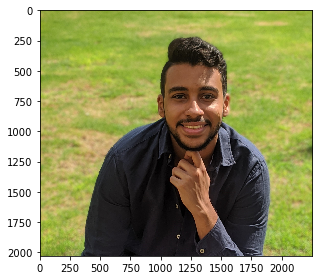

In [34]:
# reading the image and prprocess it
img1 = io.imread("../kamal.jpg")
img2 = io.imread("./images/mosalah3.jpg")
io.imshow(img1)

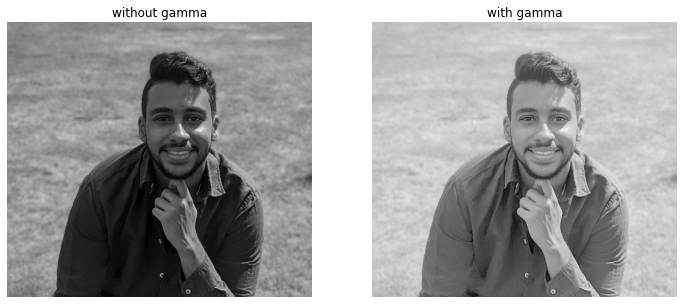

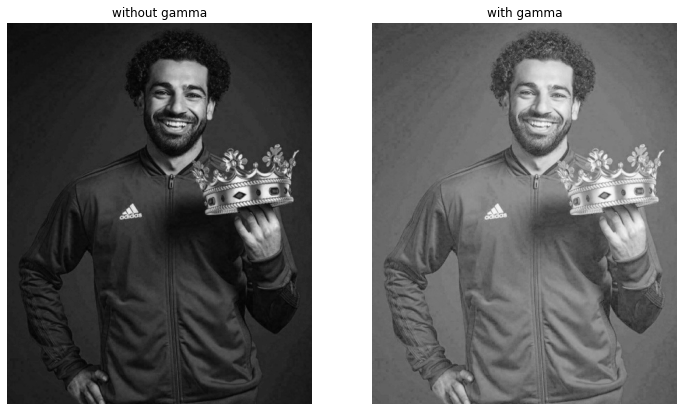

In [35]:
img1_greyscale = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) / 255
img2_greyscale = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) / 255
img1_greyscale_enhanced = (util.gamma(img1_greyscale) * 255).astype(np.uint8)
img2_greyscale_enhanced = (util.gamma(img2_greyscale) * 255).astype(np.uint8)
cf.show_images(
    [img1_greyscale, img1_greyscale_enhanced],
    ["without gamma", "with gamma"],
)
cf.show_images(
    [img2_greyscale, img2_greyscale_enhanced],
    ["without gamma", "with gamma"],
)

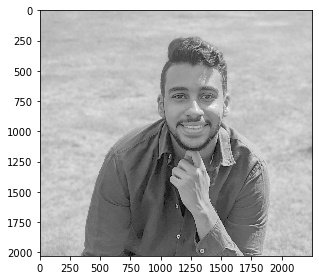

In [36]:
final_image1 = img1_greyscale_enhanced
final_image2 = img2_greyscale_enhanced
io.imshow(final_image1)

In [37]:
window_size = 19
half_window = window_size // 2
# loading the viola-jones
clf_test = ViolaJones.load("cvj_weights_data_set_2_0_3000_5000_53001_40.pkl")
clf_test.clfs

In [38]:
all_possible_faces1 = util.get_faces_in_multiple_scales(
    final_image1, clf_test, half_window, 4
)
all_possible_faces2 = util.get_faces_in_multiple_scales(
    final_image2, clf_test, half_window, 4
)
print(f"Found {len(all_possible_faces1)} candidates")
print(f"Found {len(all_possible_faces2)} candidates")


Found 12 candidates
Found 96 candidates


In [39]:
face_positions_suppressed1 = util.non_maximum_supression_multiscale(
    all_possible_faces1, threshold=0.1
)
face_positions_suppressed2 = util.non_maximum_supression_multiscale(
    all_possible_faces2, threshold=0.1
)
print(len(face_positions_suppressed1))
print(len(face_positions_suppressed2))

5
6


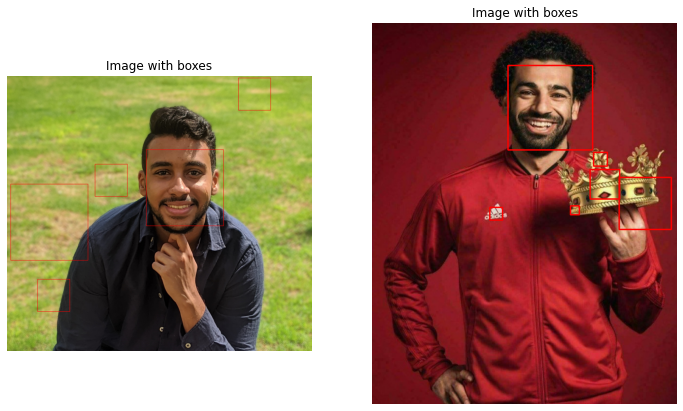

In [40]:
lbl = "Image with boxes"
cf.show_images(
    [
        util.render_boxes(img1, face_positions_suppressed1),
        util.render_boxes(img2, face_positions_suppressed2),
    ],
    [lbl, lbl],
)